In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 2.0162 - accuracy: 0.1351
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 4s 4s/step - loss: 2.0162 - accuracy: 0.1351 - val_loss: 2.0517 - val_accuracy: 0.1579
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 2.0145 - accuracy: 0.1532
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 89ms/step - loss: 2.0145 - accuracy: 0.1532 - val_loss: 2.0435 - val_accuracy: 0.1579
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 1.9814 - accuracy: 0.1622
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.9814 - accuracy: 0.1622 - val_loss: 2.0356 - val_accuracy: 0.1579
Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 1.9678 - accuracy: 0.1982
Epoch 4: savin

1/1 [==============================] - 0s 63ms/step - loss: 1.8375 - accuracy: 0.2432 - val_loss: 1.8833 - val_accuracy: 0.2105
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 1.8746 - accuracy: 0.1982
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.8746 - accuracy: 0.1982 - val_loss: 1.8785 - val_accuracy: 0.2105
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 1.8335 - accuracy: 0.2883
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 1.8335 - accuracy: 0.2883 - val_loss: 1.8738 - val_accuracy: 0.2105
Epoch 31/1000
1/1 [==============================] - ETA: 0s - loss: 1.8243 - accuracy: 0.2793
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 1.8243 - accuracy: 0.2793 - val_loss: 1.

Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 1.7385 - accuracy: 0.3243
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.7385 - accuracy: 0.3243 - val_loss: 1.7522 - val_accuracy: 0.2895
Epoch 57/1000
1/1 [==============================] - ETA: 0s - loss: 1.7284 - accuracy: 0.3063
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.7284 - accuracy: 0.3063 - val_loss: 1.7477 - val_accuracy: 0.2895
Epoch 58/1000
1/1 [==============================] - ETA: 0s - loss: 1.7165 - accuracy: 0.3153
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.7165 - accuracy: 0.3153 - val_loss: 1.7433 - val_accuracy: 0.3158
Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 1.6645 - accuracy: 0.3874
Epoch

1/1 [==============================] - ETA: 0s - loss: 1.5696 - accuracy: 0.4505
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 1.5696 - accuracy: 0.4505 - val_loss: 1.6228 - val_accuracy: 0.4474
Epoch 84/1000
1/1 [==============================] - ETA: 0s - loss: 1.5559 - accuracy: 0.4324
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 71ms/step - loss: 1.5559 - accuracy: 0.4324 - val_loss: 1.6186 - val_accuracy: 0.4737
Epoch 85/1000
1/1 [==============================] - ETA: 0s - loss: 1.5802 - accuracy: 0.4234
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 78ms/step - loss: 1.5802 - accuracy: 0.4234 - val_loss: 1.6145 - val_accuracy: 0.4737
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: 1.6110 - accuracy: 0.3604
Epoch 86: saving mo

1/1 [==============================] - ETA: 0s - loss: 1.4644 - accuracy: 0.4775
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 1.4644 - accuracy: 0.4775 - val_loss: 1.5146 - val_accuracy: 0.5789
Epoch 111/1000
1/1 [==============================] - ETA: 0s - loss: 1.4287 - accuracy: 0.5045
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.4287 - accuracy: 0.5045 - val_loss: 1.5107 - val_accuracy: 0.5789
Epoch 112/1000
1/1 [==============================] - ETA: 0s - loss: 1.4548 - accuracy: 0.5315
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 75ms/step - loss: 1.4548 - accuracy: 0.5315 - val_loss: 1.5067 - val_accuracy: 0.5789
Epoch 113/1000
1/1 [==============================] - ETA: 0s - loss: 1.4620 - accuracy: 0.4685
Epoch 113: sa

1/1 [==============================] - ETA: 0s - loss: 1.3298 - accuracy: 0.5676
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 67ms/step - loss: 1.3298 - accuracy: 0.5676 - val_loss: 1.3904 - val_accuracy: 0.6053
Epoch 138/1000
1/1 [==============================] - ETA: 0s - loss: 1.3608 - accuracy: 0.5045
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.3608 - accuracy: 0.5045 - val_loss: 1.3858 - val_accuracy: 0.6053
Epoch 139/1000
1/1 [==============================] - ETA: 0s - loss: 1.2747 - accuracy: 0.5676
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.2747 - accuracy: 0.5676 - val_loss: 1.3810 - val_accuracy: 0.6053
Epoch 140/1000
1/1 [==============================] - ETA: 0s - loss: 1.4338 - accuracy: 0.4234
Epoch 140: sa

1/1 [==============================] - ETA: 0s - loss: 1.2298 - accuracy: 0.6577
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.2298 - accuracy: 0.6577 - val_loss: 1.2549 - val_accuracy: 0.6053
Epoch 165/1000
1/1 [==============================] - ETA: 0s - loss: 1.2295 - accuracy: 0.5676
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.2295 - accuracy: 0.5676 - val_loss: 1.2496 - val_accuracy: 0.6053
Epoch 166/1000
1/1 [==============================] - ETA: 0s - loss: 1.1315 - accuracy: 0.7117
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.1315 - accuracy: 0.7117 - val_loss: 1.2444 - val_accuracy: 0.6053
Epoch 167/1000
1/1 [==============================] - ETA: 0s - loss: 1.1301 - accuracy: 0.7027
Epoch 167: sa

1/1 [==============================] - ETA: 0s - loss: 1.1525 - accuracy: 0.6036
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.1525 - accuracy: 0.6036 - val_loss: 1.0929 - val_accuracy: 0.6316
Epoch 192/1000
1/1 [==============================] - ETA: 0s - loss: 1.0830 - accuracy: 0.6396
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 78ms/step - loss: 1.0830 - accuracy: 0.6396 - val_loss: 1.0868 - val_accuracy: 0.6316
Epoch 193/1000
1/1 [==============================] - ETA: 0s - loss: 1.1133 - accuracy: 0.6216
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.1133 - accuracy: 0.6216 - val_loss: 1.0809 - val_accuracy: 0.6316
Epoch 194/1000
1/1 [==============================] - ETA: 0s - loss: 1.0610 - accuracy: 0.6486
Epoch 194: sa

1/1 [==============================] - ETA: 0s - loss: 0.9789 - accuracy: 0.7027
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.9789 - accuracy: 0.7027 - val_loss: 0.9421 - val_accuracy: 0.6316
Epoch 219/1000
1/1 [==============================] - ETA: 0s - loss: 1.0261 - accuracy: 0.6396
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 1.0261 - accuracy: 0.6396 - val_loss: 0.9381 - val_accuracy: 0.6316
Epoch 220/1000
1/1 [==============================] - ETA: 0s - loss: 1.0134 - accuracy: 0.5946
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 1.0134 - accuracy: 0.5946 - val_loss: 0.9340 - val_accuracy: 0.6316
Epoch 221/1000
1/1 [==============================] - ETA: 0s - loss: 1.0456 - accuracy: 0.6396
Epoch 221: sa

1/1 [==============================] - ETA: 0s - loss: 0.8685 - accuracy: 0.7207
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.8685 - accuracy: 0.7207 - val_loss: 0.8351 - val_accuracy: 0.6579
Epoch 246/1000
1/1 [==============================] - ETA: 0s - loss: 0.9119 - accuracy: 0.6847
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.9119 - accuracy: 0.6847 - val_loss: 0.8323 - val_accuracy: 0.6579
Epoch 247/1000
1/1 [==============================] - ETA: 0s - loss: 0.8872 - accuracy: 0.7117
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 47ms/step - loss: 0.8872 - accuracy: 0.7117 - val_loss: 0.8297 - val_accuracy: 0.6579
Epoch 248/1000
1/1 [==============================] - ETA: 0s - loss: 0.9602 - accuracy: 0.6937
Epoch 248: sa

1/1 [==============================] - ETA: 0s - loss: 0.8726 - accuracy: 0.6667
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.8726 - accuracy: 0.6667 - val_loss: 0.7546 - val_accuracy: 0.6316
Epoch 273/1000
1/1 [==============================] - ETA: 0s - loss: 0.9779 - accuracy: 0.5856
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.9779 - accuracy: 0.5856 - val_loss: 0.7522 - val_accuracy: 0.6316
Epoch 274/1000
1/1 [==============================] - ETA: 0s - loss: 0.8401 - accuracy: 0.6667
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 71ms/step - loss: 0.8401 - accuracy: 0.6667 - val_loss: 0.7502 - val_accuracy: 0.6316
Epoch 275/1000
1/1 [==============================] - ETA: 0s - loss: 0.8292 - accuracy: 0.7027
Epoch 275: sa

1/1 [==============================] - ETA: 0s - loss: 0.8594 - accuracy: 0.6757
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.8594 - accuracy: 0.6757 - val_loss: 0.7023 - val_accuracy: 0.6316
Epoch 300/1000
1/1 [==============================] - ETA: 0s - loss: 0.8570 - accuracy: 0.6847
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.8570 - accuracy: 0.6847 - val_loss: 0.6998 - val_accuracy: 0.6316
Epoch 301/1000
1/1 [==============================] - ETA: 0s - loss: 0.8268 - accuracy: 0.7387
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.8268 - accuracy: 0.7387 - val_loss: 0.6974 - val_accuracy: 0.6316
Epoch 302/1000
1/1 [==============================] - ETA: 0s - loss: 0.7927 - accuracy: 0.6847
Epoch 302: sa

1/1 [==============================] - ETA: 0s - loss: 0.7594 - accuracy: 0.7297
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.7594 - accuracy: 0.7297 - val_loss: 0.6307 - val_accuracy: 0.7105
Epoch 327/1000
1/1 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0.7297
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 79ms/step - loss: 0.7443 - accuracy: 0.7297 - val_loss: 0.6278 - val_accuracy: 0.7105
Epoch 328/1000
1/1 [==============================] - ETA: 0s - loss: 0.7566 - accuracy: 0.7477
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 68ms/step - loss: 0.7566 - accuracy: 0.7477 - val_loss: 0.6251 - val_accuracy: 0.7105
Epoch 329/1000
1/1 [==============================] - ETA: 0s - loss: 0.7547 - accuracy: 0.7748
Epoch 329: sa

1/1 [==============================] - ETA: 0s - loss: 0.7312 - accuracy: 0.7117
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.7312 - accuracy: 0.7117 - val_loss: 0.5806 - val_accuracy: 0.7368
Epoch 354/1000
1/1 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0.7387
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.7443 - accuracy: 0.7387 - val_loss: 0.5797 - val_accuracy: 0.7368
Epoch 355/1000
1/1 [==============================] - ETA: 0s - loss: 0.7460 - accuracy: 0.7387
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.7460 - accuracy: 0.7387 - val_loss: 0.5787 - val_accuracy: 0.7368
Epoch 356/1000
1/1 [==============================] - ETA: 0s - loss: 0.7753 - accuracy: 0.6667
Epoch 356: sa

1/1 [==============================] - ETA: 0s - loss: 0.7251 - accuracy: 0.7117
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.7251 - accuracy: 0.7117 - val_loss: 0.5460 - val_accuracy: 0.7368
Epoch 381/1000
1/1 [==============================] - ETA: 0s - loss: 0.6348 - accuracy: 0.7838
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 78ms/step - loss: 0.6348 - accuracy: 0.7838 - val_loss: 0.5443 - val_accuracy: 0.7368
Epoch 382/1000
1/1 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.8018
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 94ms/step - loss: 0.6644 - accuracy: 0.8018 - val_loss: 0.5427 - val_accuracy: 0.7368
Epoch 383/1000
1/1 [==============================] - ETA: 0s - loss: 0.6788 - accuracy: 0.7658
Epoch 383: sa

1/1 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.7387
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.6785 - accuracy: 0.7387 - val_loss: 0.5049 - val_accuracy: 0.7632
Epoch 408/1000
1/1 [==============================] - ETA: 0s - loss: 0.6452 - accuracy: 0.7838
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.6452 - accuracy: 0.7838 - val_loss: 0.5038 - val_accuracy: 0.7632
Epoch 409/1000
1/1 [==============================] - ETA: 0s - loss: 0.7379 - accuracy: 0.7387
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 71ms/step - loss: 0.7379 - accuracy: 0.7387 - val_loss: 0.5027 - val_accuracy: 0.7632
Epoch 410/1000
1/1 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.7568
Epoch 410: sa

1/1 [==============================] - ETA: 0s - loss: 0.5665 - accuracy: 0.8108
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.5665 - accuracy: 0.8108 - val_loss: 0.4907 - val_accuracy: 0.7632
Epoch 435/1000
1/1 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.7387
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.6488 - accuracy: 0.7387 - val_loss: 0.4889 - val_accuracy: 0.7632
Epoch 436/1000
1/1 [==============================] - ETA: 0s - loss: 0.6705 - accuracy: 0.7387
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.6705 - accuracy: 0.7387 - val_loss: 0.4876 - val_accuracy: 0.7632
Epoch 437/1000
1/1 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.8108
Epoch 437: sa

1/1 [==============================] - ETA: 0s - loss: 0.5996 - accuracy: 0.7477
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.5996 - accuracy: 0.7477 - val_loss: 0.4654 - val_accuracy: 0.7632
Epoch 462/1000
1/1 [==============================] - ETA: 0s - loss: 0.6297 - accuracy: 0.7838
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.6297 - accuracy: 0.7838 - val_loss: 0.4652 - val_accuracy: 0.7632
Epoch 463/1000
1/1 [==============================] - ETA: 0s - loss: 0.5730 - accuracy: 0.7748
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.5730 - accuracy: 0.7748 - val_loss: 0.4651 - val_accuracy: 0.7632
Epoch 464/1000
1/1 [==============================] - ETA: 0s - loss: 0.6218 - accuracy: 0.7838
Epoch 464: sa

1/1 [==============================] - ETA: 0s - loss: 0.6041 - accuracy: 0.7838
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 78ms/step - loss: 0.6041 - accuracy: 0.7838 - val_loss: 0.4546 - val_accuracy: 0.7632
Epoch 489/1000
1/1 [==============================] - ETA: 0s - loss: 0.5615 - accuracy: 0.8018
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.5615 - accuracy: 0.8018 - val_loss: 0.4539 - val_accuracy: 0.7632
Epoch 490/1000
1/1 [==============================] - ETA: 0s - loss: 0.6576 - accuracy: 0.7477
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.6576 - accuracy: 0.7477 - val_loss: 0.4533 - val_accuracy: 0.7632
Epoch 491/1000
1/1 [==============================] - ETA: 0s - loss: 0.6105 - accuracy: 0.8018
Epoch 491: sa

1/1 [==============================] - ETA: 0s - loss: 0.5608 - accuracy: 0.8018
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.5608 - accuracy: 0.8018 - val_loss: 0.4339 - val_accuracy: 0.7632
Epoch 516/1000
1/1 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.7568
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.6668 - accuracy: 0.7568 - val_loss: 0.4328 - val_accuracy: 0.7632
Epoch 517/1000
1/1 [==============================] - ETA: 0s - loss: 0.5663 - accuracy: 0.7928
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.5663 - accuracy: 0.7928 - val_loss: 0.4318 - val_accuracy: 0.7632
Epoch 518/1000
1/1 [==============================] - ETA: 0s - loss: 0.6549 - accuracy: 0.7477
Epoch 518: sa

1/1 [==============================] - ETA: 0s - loss: 0.6332 - accuracy: 0.7658
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.6332 - accuracy: 0.7658 - val_loss: 0.4198 - val_accuracy: 0.7632
Epoch 543/1000
1/1 [==============================] - ETA: 0s - loss: 0.5549 - accuracy: 0.7928
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.5549 - accuracy: 0.7928 - val_loss: 0.4185 - val_accuracy: 0.7632
Epoch 544/1000
1/1 [==============================] - ETA: 0s - loss: 0.5375 - accuracy: 0.8468
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.5375 - accuracy: 0.8468 - val_loss: 0.4176 - val_accuracy: 0.7632
Epoch 545/1000
1/1 [==============================] - ETA: 0s - loss: 0.6646 - accuracy: 0.7027
Epoch 545: sa

1/1 [==============================] - ETA: 0s - loss: 0.6198 - accuracy: 0.7658
Epoch 569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.6198 - accuracy: 0.7658 - val_loss: 0.3995 - val_accuracy: 0.7895
Epoch 570/1000
1/1 [==============================] - ETA: 0s - loss: 0.5392 - accuracy: 0.8468
Epoch 570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 0.5392 - accuracy: 0.8468 - val_loss: 0.3994 - val_accuracy: 0.7895
Epoch 571/1000
1/1 [==============================] - ETA: 0s - loss: 0.4506 - accuracy: 0.8468
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.4506 - accuracy: 0.8468 - val_loss: 0.3995 - val_accuracy: 0.8158
Epoch 572/1000
1/1 [==============================] - ETA: 0s - loss: 0.5808 - accuracy: 0.8018
Epoch 572: sa

1/1 [==============================] - ETA: 0s - loss: 0.4917 - accuracy: 0.8108
Epoch 596: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.4917 - accuracy: 0.8108 - val_loss: 0.3775 - val_accuracy: 0.8158
Epoch 597/1000
1/1 [==============================] - ETA: 0s - loss: 0.5456 - accuracy: 0.7838
Epoch 597: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.5456 - accuracy: 0.7838 - val_loss: 0.3770 - val_accuracy: 0.8158
Epoch 598/1000
1/1 [==============================] - ETA: 0s - loss: 0.6260 - accuracy: 0.7568
Epoch 598: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.6260 - accuracy: 0.7568 - val_loss: 0.3768 - val_accuracy: 0.8158
Epoch 599/1000
1/1 [==============================] - ETA: 0s - loss: 0.5502 - accuracy: 0.7838
Epoch 599: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 31ms/step - loss: 0.3866 - accuracy: 0.8684


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 141ms/step
[5.2110565e-01 3.4582532e-05 2.7476747e-03 4.6254298e-01 1.0572606e-02
 7.3305500e-04 2.2634729e-03]
0


# Confusion matrix

2/2 [==============================] - 0s 0s/step


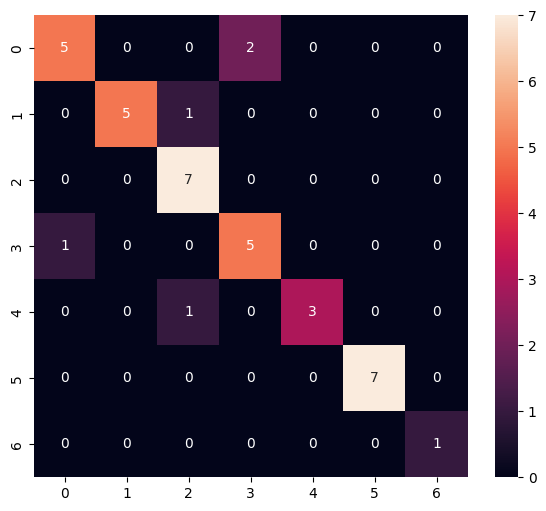

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       1.00      0.83      0.91         6
           2       0.78      1.00      0.88         7
           3       0.71      0.83      0.77         6
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         1

    accuracy                           0.87        38
   macro avg       0.90      0.88      0.88        38
weighted avg       0.88      0.87      0.87        38



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Faizan\AppData\Local\Temp\tmpjh6exbtn\assets


6676

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 78.1 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.2110559e-01 3.4582557e-05 2.7476759e-03 4.6254298e-01 1.0572606e-02
 7.3305570e-04 2.2634710e-03]
0
